# Atividade 2 - Gradient Boost Machine
---

#### 1. Cite 5 diferenças entre o AdaBoost e o GBM.
I) O **AdaBoost** ajusta os pesos das amostras a cada iteração, dando mais peso aos erros anteriores. Já o **GBM**, ajusta o modelo diretamente nos resíduos, via gradiente. Neste, o foco é reduzir a loss, não reponderar amostras.

II) Em relação a ```função de perda```(loss), o **AdaBoost** minimiza explicitamente, porém fica mais preso à exponencial. A **GBM** escolhe a loss, é mais geral e flexível, podendo utilizar diferentes funções.

III) O **AdaBoost** foca mais nos exemplos difíceis de classificar ao longo das iterações, já o **GBM** foca em reduzir gradualmente o erro global do modelo.

IV) **AdaBoost** costuma ser mais sensível a ```outliers```, pois o peso deles aumenta muito, amostras atípicas viram muito influentes. O **GBM**, se escolher uma função de perda robusta, torna-se menos sensível a isso.

V) O **AdaBoost** é geralmente mais simples de implementar, no sentido de trabalhar com menos hiperparâmetros; já o **GBM**, pelo fato de ter mais hiperparâmetros, torna-se mais complexo, porém mais flexível e costuma atingir melhor equilíbrio ```viés-variância```.

#### 2. Acesse o link Scikit-learn – GBM, leia a explicação (traduza se for preciso) e crie um jupyter notebook contendo o exemplo de classificação e de regressão do GBM.

In [10]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)
0.8965

0.8965

#### 3. Cite 5 Hyperparametros importantes no GBM.

Podemos citar cinco áreas em que os hiperparâmetros trabalham:
1. quantidade de modelos adicionados;
2. complexidade de cada modelo base;
3. ritmo de aprendizado;
4. amostragem de dados e variáveis;
5. função de perda

Abaixo estão alguns hiperparâmetros importantes:

I) ```n_estimators```: número de iterações, quanto mais árvores, maior a capacidade; porém, há o risco de *overfitting* se o **learning_rate** for alto.

II) ```learning_rate```: fator multiplicativo para cada árvore, é aquela variável **eta** vista em aula. Valores pequenos melhoram a generalização, mas exigem mais árvores. Recomenda-se o valor 0.1.

III) ```loss```: é a função de perda, ou seja, qual função de perda o algoritmo vai tentar minimizar a cada iteração. Isso muda como o gradiente é calculado e qual tipo de erro o modelo vai priorizar corrigir. Por exemplo, se colocar **squared_error**, ele minimiza o erro quadrático médio. 

Existem funções específicas para ```regressão``` e ```classificação```:

        - regressão: squared_error, absolute_error, huber, quantile;
        - classificação: log_loss, exponential.

IV) ```min_samples_leaf```: é o mínimo de amostra por folha, útil para suavizar previsões e evitar overfitting.

V) ```max_depth```: profundidade máxima da árvore. Se profundo demais, risco de overfitting, se raso, underfitting.


#### Conclusão
Percebe-se que controlar os hiperparâmetros é crucial para potencializar a ferramenta GBM, encontrar a medida correta para cada parâmetro e fazê-los dialogarem harmoniosamente será o principal desafio.

#### 4. (Opcional) Utilize o GridSearch para encontrar os melhores hyperparametros para o conjunto de dados do exemplo

In [36]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [85]:
%%time

# Carregar os dados
X, y = make_hastie_10_2(random_state = 0)

# Separando o X e Y
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

params = {
    'n_estimators': [500,1000],
    'learning_rate': [0.02, 0.05, 0.1],
    'max_depth': [1, 2, 3],
    'subsample': [0.6, 0.8],
    'min_samples_split': [5,10,20],
    'min_samples_leaf': [5,10,20],
    'max_features': ['sqrt', 'log2']
}

GBM_grid = GridSearchCV(
    GradientBoostingClassifier(random_state = 42),
    params,
    cv = 3,
    n_jobs= -1,
    verbose = 2)

GBM_grid.fit(X_train, y_train)
GBM_grid.score(X_test, y_test)

print("Melhores parâmetros", GBM_grid.best_params_)
print("Acurácia treino:", GBM_grid.score(X_train, y_train))
print("Acurácia teste :", GBM_grid.score(X_test, y_test))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Melhores parâmetros {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 1000, 'subsample': 0.6}
Acurácia treino: 1.0
Acurácia teste : 0.9403
CPU times: total: 5.08 s
Wall time: 3min 21s


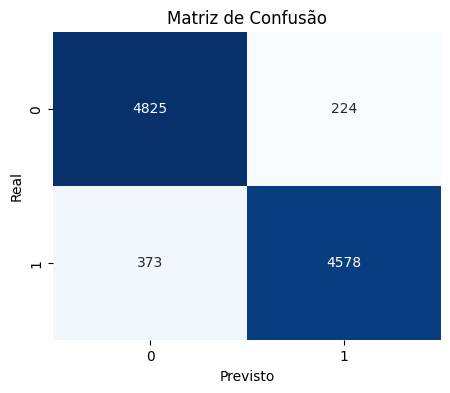

Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.93      0.96      0.94      5049
         1.0       0.95      0.92      0.94      4951

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

ROC AUC: 0.9888978537498743


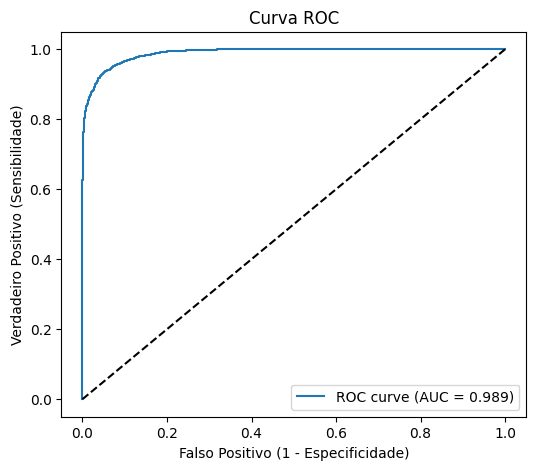

In [90]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Previsões
y_pred = GBM_grid.best_estimator_.predict(X_test)
y_proba = GBM_grid.best_estimator_.predict_proba(X_test)[:, 1]

# ---------------------------
# 1. Matriz de Confusão
# ---------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# ---------------------------
# 2. Relatório de classificação
# ---------------------------
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# ---------------------------
# 3. ROC AUC
# ---------------------------
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], "k--")  # linha aleatória
plt.xlabel("Falso Positivo (1 - Especificidade)")
plt.ylabel("Verdadeiro Positivo (Sensibilidade)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


#### 5. Acessando o artigo do Jerome Friedman (Stochastic) e pensando no nome dado ao Stochastic GBM, qual é a maior diferença entre os dois algoritmos?

Pensando no nome, podemos afirmar que a principal diferença está no processo de iteração, visto que o Stochastic utiliza apenas uma amostra aleatória dos dados em cada iteração; diferentemente do GBM padrão, que usa todos os dados disponíveis.